In [1]:
import scipy

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import plotly.plotly as py

In [6]:
import plotly.graph_objs as go

In [7]:
import plotly.figure_factory as ff

In [ ]:
#ANDERSON DARLING TEST

In [8]:
from scipy.stats import anderson

In [93]:
df = pd.read_excel('Proband_21.xlsx')

In [102]:
#df['Avg_Pupil_Size'] = (df['PupilLeft']+ df['PupilRight'])/2

In [94]:
Pupil_Left = df['PupilLeft']
Pupil_Right = df['PupilRight']

In [95]:
Pupil_Left.dropna(inplace=True)
Pupil_Right.dropna(inplace=True)

In [96]:
Pupil_Left = Pupil_Left.str.replace(',','.').astype(float)
Pupil_Right = Pupil_Right.str.replace(',','.').astype(float)

In [106]:
Avg_Pupil_size = (Pupil_Left+Pupil_Right)/2
#print(Avg_Pupil_size.head(5), Pupil_Left.head(5), Pupil_Right.head(5))
Avg_Pupil_size.dropna(inplace=True)
len(Avg_Pupil_size)

145856

Anderson-Darling

In [121]:
Avg_Pupil_size = np.array(Avg_Pupil_size)
Avg_Pupil_size = np.float64(Avg_Pupil_size)

from numpy import std
from numpy import mean


print('mean=%.3f stdv=%.3f' % (mean(Avg_Pupil_size), std(Avg_Pupil_size)))

from scipy.stats import anderson

result = anderson(Avg_Pupil_size, dist='norm')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, distribution looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, distribution does not look normal (reject H0)' % (sl, cv))


mean=3.232 stdv=0.240
Statistic: 2675.806
15.000: 0.576, distribution does not look normal (reject H0)
10.000: 0.656, distribution does not look normal (reject H0)
5.000: 0.787, distribution does not look normal (reject H0)
2.500: 0.918, distribution does not look normal (reject H0)
1.000: 1.092, distribution does not look normal (reject H0)


Histogram

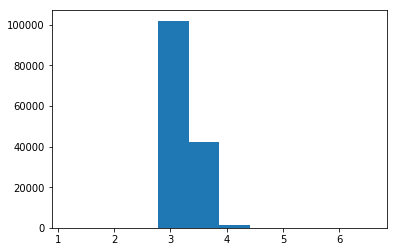

In [113]:
from matplotlib import pyplot
%matplotlib inline
pyplot.hist(Avg_Pupil_size)
#pyplot.
pyplot.show()

In [122]:
from statsmodels.graphics.gofplots import qqplot

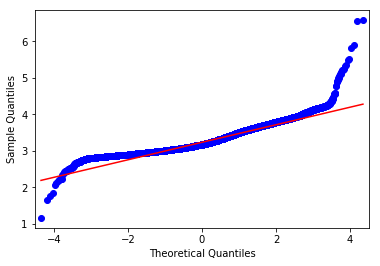

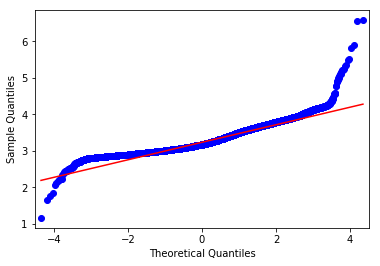

In [123]:
qqplot(Avg_Pupil_size,line = 's')
